In [1]:
import cmdtools
from cmdtools.estimation.sqra import SQRA
import numpy as np, matplotlib.pyplot as plt

# 1. Generator estimation via SQRA

The square root approximation allows us to estimate the generator for an arbitrarily given potential function:

In [2]:
xs = np.linspace(-1.4, 1.4, 20)
u  = (xs**2-1)**2

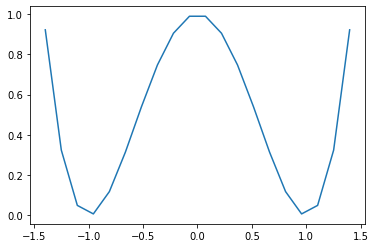

In [3]:
plt.plot(xs,u)

In [4]:
s = cmdtools.estimation.sqra.SQRA(u, beta=0.1) # beta is the inverse temperature of the system
Q = s.Q.toarray() # convert sparse to dense for plotting

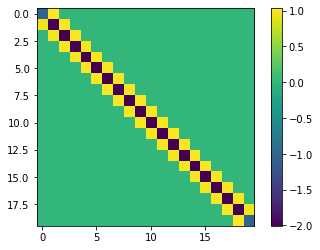

In [5]:
plt.imshow(Q)
plt.colorbar()

We intend to provide a collection of toy systems. Suggestions for there are very welcome.

The following line constructs the potential for a triple well and implicitly computes its generator via the SQRA.

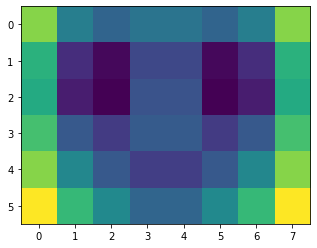

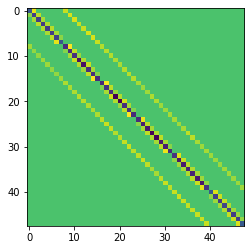

In [6]:
triplewell = cmdtools.systems.diffusion.TripleWell(nx=8,ny=6)
plt.imshow(triplewell.u)
plt.figure()
plt.imshow(triplewell.Q.toarray())

In [7]:
# Note that the generator estimation is fairly fast even for moderate sized systems (eg. this sparse 10000x10000 matrix)
%time bigsystem = cmdtools.systems.diffusion.TripleWell(nx=100,ny=100)
bigsystem.Q

CPU times: user 270 ms, sys: 17.8 ms, total: 288 ms
Wall time: 283 ms


<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Column format>

# 2. Time-dependent processes

In [8]:
ts = [0,1,2]
us = [u + xs * t for t in ts]

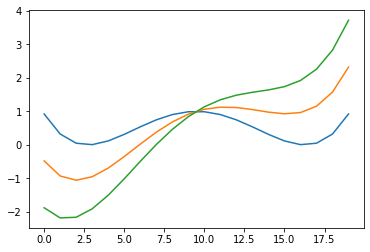

In [9]:
for ut in us:
    plt.plot(ut)

In [10]:
qs = [SQRA(u, beta = 10).Q for u in us] # array with the generators
dts = [1,1,1] # and time interval lengthes that each generator is active

In [11]:
ajc = cmdtools.estimation.ajcs.AJCS(qs, dts) # construct the augmented jump chain

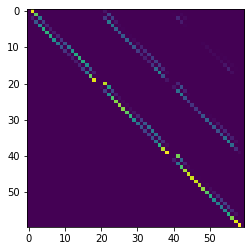

In [12]:
plt.imshow(ajc.km.todense()) # ajc.kh contains the transition 'k'ernel 'm'atrix

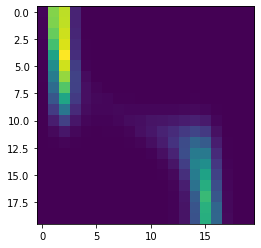

In [25]:
plt.imshow(ajc.koopman())

By solving linear systems similar to the committor equations 
$$Kc = c \text{ in } A\cup B \\c = 1_A \text{ on } \delta(A \cup B)$$
we can solve for space-time committors.


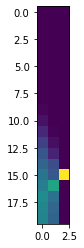

In [40]:
# Solving for c=Ind(15) on the last timeframe gives the probability to hit state 15 at the last time
plt.imshow(ajc.koopman_system_one(15).T)

In [41]:
# Setting c=1 on {15} x T gives the probablity to hit state 15 inside the timespan (a finite time hitting probability)